In [1]:
from pathlib import Path
import sys
import pandas as pd
import numpy as np
from IPython.display import display

OUTPUT_DIR = Path.cwd() / "output"       

OUTPUT_DIR.mkdir(exist_ok=True)


NA_VALUES = ["---", "--", "", " ", "NA", "N/A"]
# =========================
# FILE FINDER
# =========================
def find_file(name, start=Path.cwd()):
    for ancestor in [start] + list(start.parents):
        matches = list(ancestor.rglob(name))
        if matches:
            return matches[0]
    return None


def find_files(file_map):
    found = {}
    for key, filename in file_map.items():
        path = find_file(filename)
        if path:
            found[key] = path
        else:
            print(f"[WARNING] File not found: {filename}")
    return found

eda_script_path = find_file("script_eda.py")
if eda_script_path is None:
    raise FileNotFoundError("❌ script_eda.py tidak ditemukan di parent directory")

# tambahkan BASE PROJECT ke sys.path
sys.path.append(str(eda_script_path.parent))

# sekarang bisa import
from script_eda import evaluate_dataset, extract_column_schema,find_internal_duplicate_columns,extract_single_schema,cek_value_data_column




In [2]:
path_libur_nasional = find_file("dataset-libur-nasional-dan-weekend.csv")

if path_libur_nasional is None:
    raise FileNotFoundError("❌ File merged tidak ditemukan")

df_libur_nasional = pd.read_csv(path_libur_nasional, na_values=NA_VALUES)
"""
evaluate_dataset(
    df_libur_nasional,
    name="Jumlah Penduduk",
    unique=["periode_data","tahun","nama_provinsi","nama_kabupaten_kota","nama_kecamatan","nama_kelurahan","usia","jenis_kelamin"]
)
"""
extract_single_schema(df_libur_nasional)
print("Total rows:", df_libur_nasional.shape[0])
print("Total columns:", df_libur_nasional.shape[1])

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.width", None)

unique_df = cek_value_data_column(
    df_libur_nasional,
    exception=[],
    return_df=True
)






Total rows: 5844
Total columns: 5
📋 UNIQUE VALUE REPORT (WIDE FORMAT)
Total columns : 5
Max rows      : 5844


,tanggal,is_holiday_nasional,nama_libur,is_weekend,day_name
0,2010-01-01,1.0,New Year's Day,0.0,Friday
1,2010-01-02,0.0,Lunar New Year,1.0,Saturday
2,2010-01-03,NaN,Prophet's Birthday,NaN,Sunday
3,2010-01-04,NaN,Day of Silence,NaN,Monday
4,2010-01-05,NaN,Good Friday,NaN,Tuesday
5,2010-01-06,NaN,Ascension Day,NaN,Wednesday
6,2010-01-07,NaN,Vesak Day,NaN,Thursday
7,2010-01-08,NaN,Isra' and Mi'raj,NaN,None
8,2010-01-09,NaN,Independence Day,NaN,None
9,2010-01-10,NaN,Eid al-Fitr,NaN,None



================ Libur Nasional ================



,tanggal,is_holiday_nasional,nama_libur,is_weekend,day_name
0,2010-01-01,1,New Year's Day,0,Friday
1,2010-01-02,0,NaN,1,Saturday
2,2010-01-03,0,NaN,1,Sunday
3,2010-01-04,0,NaN,0,Monday
4,2010-01-05,0,NaN,0,Tuesday


📌 Columns:


,column,dtype
0,tanggal,object
1,is_holiday_nasional,int64
2,nama_libur,object
3,is_weekend,int64
4,day_name,object


⚠️ Kolom dengan data null:


,jumlah_null
nama_libur,5587


ℹ️ Kolom unik tidak ditentukan, skip cek duplikat


,count,mean,std,min,25%,50%,75%,max
is_holiday_nasional,5844.000000,0.043977,0.205061,0.000000,0.000000,0.000000,0.000000,1.000000
is_weekend,5844.000000,0.285763,0.451816,0.000000,0.000000,0.000000,1.000000,1.000000


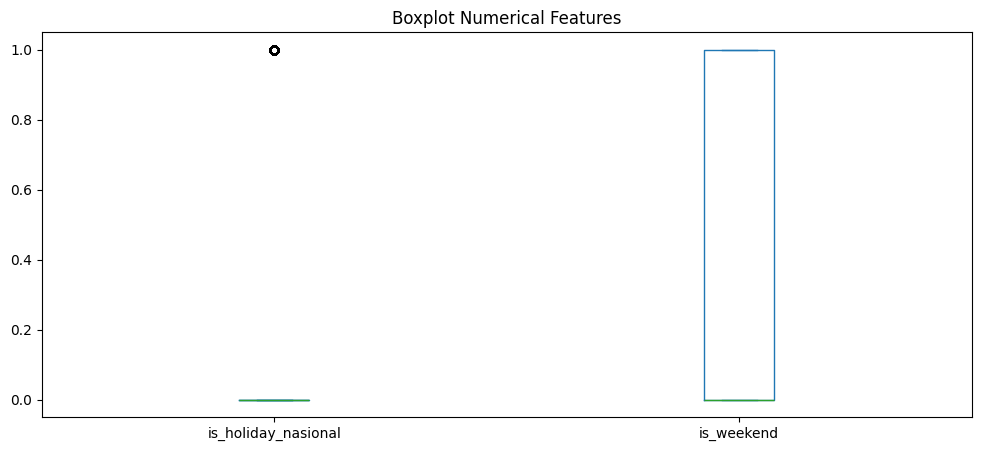

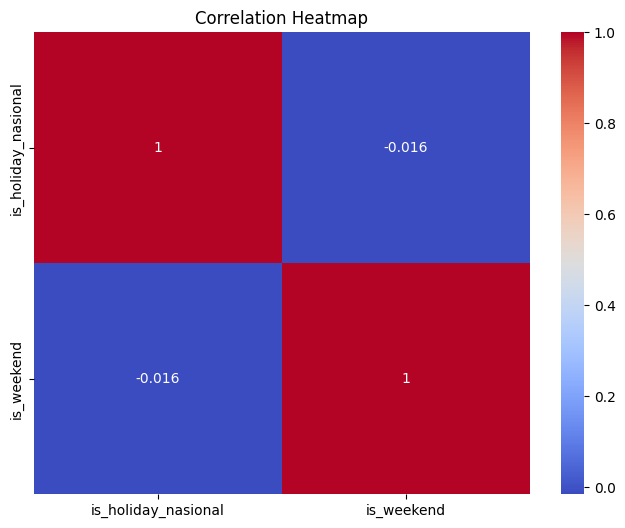

In [3]:
evaluate_dataset(
    df_libur_nasional,
    name="Libur Nasional"
)